In [2]:
with open('.env', 'w') as f:
    f.write("ROBOFLOW_API_KEY=sQ6CUvfwFn0uOart4IQY")

In [3]:
!pip install python-dotenv

from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv()

# Access the API key
roboflow_api_key = os.getenv('ROBOFLOW_API_KEY')
print(f"Your API Key: {roboflow_api_key}")  # Ensure it's correctly loaded

Your API Key: sQ6CUvfwFn0uOart4IQY


In [ ]:
# Install YOLOv8 from Ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 28.2 MB/s eta 0:00:00


In [ ]:
# Import necessary modules
from ultralytics import YOLO
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=roboflow_api_key)
project = rf.workspace("matan-nitzan").project("israeli-coins-detected")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Israeli-coins-detected-3 in yolov8:: 100%|██████████| 1568/1568 [00:00<00:00, 3807.52it/s]


In [ ]:
print(f"Dataset downloaded to: {dataset.location}")

Dataset downloaded to: /content/Israeli-coins-detected-3


In [ ]:
data_yaml = f"{dataset.location}/data.yaml"

In [ ]:
# Display the content of the data.yaml file
!cat /content/Israeli-coins-detected-3/data.yaml

names:
- Five
- One
- Ten
- Two
nc: 4
roboflow:
  license: CC BY 4.0
  project: israeli-coins-detected
  url: https://universe.roboflow.com/matan-nitzan/israeli-coins-detected/dataset/3
  version: 3
  workspace: matan-nitzan
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
# # Initialize the YOLOv8 model
model = YOLO('yolov8n.pt')
# # First Training Run
# # Train the model
# model.train(
#     data=data_yaml,
#     epochs=50,
#     imgsz=416,
#     batch=16,
#     name="Israeli_Coins_Run1"
# )


# The attempt to improve the model
model.train(
    data=data_yaml,
    epochs=100,               # Increased epochs
    imgsz=416,                # Higher resolution
    batch=32,                 # Batch size
    name="Israeli_Coins_Improved",
    augment=True              # Enable augmentations
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 150MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Israeli-coins-detected-3/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Israeli_Coins_Improved, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 86.7MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 150MB/s]


AMP: checks passed ✅


train: Scanning /content/Israeli-coins-detected-3/train/labels... 681 images, 3 backgrounds, 0 corrupt: 100%|██████████| 681/681 [00:00<00:00, 843.20it/s]


train: New cache created: /content/Israeli-coins-detected-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Israeli-coins-detected-3/valid/labels... 64 images, 1 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<00:00, 653.18it/s]

val: New cache created: /content/Israeli-coins-detected-3/valid/labels.cache


Plotting labels to runs/detect/Israeli_Coins_Improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/Israeli_Coins_Improved
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.1G     0.9341      3.422     0.9534         51        416: 100%|██████████| 22/22 [00:13<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all         64        278     0.0144      0.918      0.239      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.93G     0.7377      1.902     0.8857         47        416: 100%|██████████| 22/22 [00:10<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         64        278     0.0161      0.973      0.312       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.95G     0.6816      1.573     0.8798         97        416: 100%|██████████| 22/22 [00:07<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         64        278      0.619      0.238      0.582      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.95G     0.6675      1.436     0.8799         26        416: 100%|██████████| 22/22 [00:10<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         64        278      0.737      0.224      0.456        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.01G     0.6594      1.248     0.8691         59        416: 100%|██████████| 22/22 [00:10<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         64        278      0.572      0.637      0.689      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.01G     0.6612       1.21      0.874         44        416: 100%|██████████| 22/22 [00:07<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         64        278       0.68      0.604      0.749       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.07G     0.6338      1.085     0.8713         59        416: 100%|██████████| 22/22 [00:10<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         64        278      0.708      0.745      0.787      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.96G     0.6387      1.035     0.8597         69        416: 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         64        278      0.789      0.683      0.805      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.92G     0.6323     0.9912     0.8694         76        416: 100%|██████████| 22/22 [00:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         64        278      0.705       0.77      0.807      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.97G     0.5967     0.9633     0.8637         55        416: 100%|██████████| 22/22 [00:10<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         64        278      0.716      0.736       0.81      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.92G     0.5998        0.9     0.8595         33        416: 100%|██████████| 22/22 [00:09<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         64        278      0.709      0.665      0.788      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.21G     0.5884     0.8782     0.8521         47        416: 100%|██████████| 22/22 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         64        278      0.719      0.844      0.874      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.97G     0.5886     0.8712     0.8627         47        416: 100%|██████████| 22/22 [00:10<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         64        278      0.818      0.829      0.879      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.02G     0.5916     0.8244     0.8577         53        416: 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         64        278      0.737      0.725      0.806      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.91G      0.573     0.8108     0.8516         63        416: 100%|██████████| 22/22 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         64        278      0.805      0.798       0.88        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.99G      0.584     0.7934     0.8514         48        416: 100%|██████████| 22/22 [00:11<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         64        278      0.867      0.823      0.911      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.02G     0.5807     0.7406     0.8519         54        416: 100%|██████████| 22/22 [00:09<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all         64        278      0.836      0.816      0.905      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.01G     0.5682     0.7222     0.8488         63        416: 100%|██████████| 22/22 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         64        278      0.889      0.868      0.932      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       1.9G     0.5352     0.6806     0.8482         34        416: 100%|██████████| 22/22 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         64        278       0.84      0.816      0.913      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.9G     0.5675     0.7072     0.8457         90        416: 100%|██████████| 22/22 [00:08<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         64        278       0.75      0.806      0.852      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.91G     0.5453     0.6668     0.8476         58        416: 100%|██████████| 22/22 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         64        278      0.916      0.796      0.914      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.01G     0.5604     0.6665     0.8471         48        416: 100%|██████████| 22/22 [00:10<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         64        278      0.894       0.82      0.913      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.98G     0.5437     0.6848      0.848         39        416: 100%|██████████| 22/22 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         64        278      0.821      0.778      0.876      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.11G     0.5544     0.6653     0.8441         41        416: 100%|██████████| 22/22 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         64        278      0.793      0.845      0.899      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.95G     0.5385     0.6402     0.8391         73        416: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         64        278      0.856      0.914      0.939      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.02G      0.548     0.6375     0.8438         47        416: 100%|██████████| 22/22 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         64        278      0.884      0.803      0.921      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.06G     0.5518     0.6167     0.8381         55        416: 100%|██████████| 22/22 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         64        278       0.84      0.876      0.927       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         2G     0.5479     0.6033     0.8461         33        416: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         64        278       0.81      0.825      0.912      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         2G     0.5335      0.593     0.8432         78        416: 100%|██████████| 22/22 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         64        278      0.894      0.886      0.944      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.96G     0.5246     0.5777      0.841         80        416: 100%|██████████| 22/22 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         64        278      0.916      0.851      0.945      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         2G     0.5297      0.563     0.8386         37        416: 100%|██████████| 22/22 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         64        278      0.863      0.846      0.912      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       1.9G     0.5266     0.5717     0.8431         38        416: 100%|██████████| 22/22 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         64        278      0.931      0.864      0.952      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.98G     0.5477     0.5848     0.8527         65        416: 100%|██████████| 22/22 [00:10<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         64        278      0.859      0.901      0.942      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.99G     0.5307     0.5553     0.8374         48        416: 100%|██████████| 22/22 [00:09<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         64        278      0.919      0.892      0.944      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.97G     0.5185     0.5174     0.8386         40        416: 100%|██████████| 22/22 [00:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         64        278      0.804       0.84      0.897      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.92G       0.51     0.5446     0.8363         71        416: 100%|██████████| 22/22 [00:11<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         64        278      0.865      0.872      0.941      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.95G     0.5028     0.5238     0.8332         28        416: 100%|██████████| 22/22 [00:08<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all         64        278      0.903      0.882      0.944      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.94G     0.5136     0.5279     0.8442         41        416: 100%|██████████| 22/22 [00:08<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         64        278       0.92      0.853      0.943      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.01G     0.5189     0.5272     0.8367         30        416: 100%|██████████| 22/22 [00:10<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         64        278      0.863      0.864      0.934      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.11G     0.5095     0.5099     0.8366         66        416: 100%|██████████| 22/22 [00:08<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all         64        278       0.91      0.863      0.945      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.01G     0.5256     0.4964      0.833         63        416: 100%|██████████| 22/22 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         64        278      0.884      0.946      0.966      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.94G     0.5004     0.4783     0.8333         47        416: 100%|██████████| 22/22 [00:10<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         64        278      0.882      0.922      0.941      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.93G     0.4931     0.4861     0.8336         50        416: 100%|██████████| 22/22 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         64        278      0.885       0.92      0.954       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.95G      0.486     0.4732     0.8273         55        416: 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         64        278      0.913      0.915      0.957      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.97G     0.4964     0.4923     0.8318         73        416: 100%|██████████| 22/22 [00:10<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         64        278      0.908      0.892       0.96      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.12G     0.4914     0.4986     0.8324         40        416: 100%|██████████| 22/22 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         64        278      0.933      0.889      0.947      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.91G     0.4883     0.4614     0.8343         67        416: 100%|██████████| 22/22 [00:09<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         64        278       0.87      0.918      0.936      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.05G     0.4916     0.4752     0.8324         58        416: 100%|██████████| 22/22 [00:10<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         64        278      0.899      0.909      0.956      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.1G     0.4876     0.4617     0.8312         63        416: 100%|██████████| 22/22 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         64        278      0.902      0.913      0.946      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.92G     0.4918     0.4722     0.8354         39        416: 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         64        278      0.922      0.903      0.945      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.06G     0.4823     0.4543     0.8345         42        416: 100%|██████████| 22/22 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all         64        278      0.937      0.886      0.957      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.01G     0.4779      0.455     0.8342        116        416: 100%|██████████| 22/22 [00:07<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         64        278       0.95      0.929      0.967      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.99G     0.4702     0.4281     0.8264         55        416: 100%|██████████| 22/22 [00:10<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         64        278      0.939      0.863      0.958      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.95G     0.4812     0.4443     0.8316         92        416: 100%|██████████| 22/22 [00:09<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         64        278      0.941      0.936      0.946      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.94G     0.4683     0.4419     0.8309         64        416: 100%|██████████| 22/22 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         64        278      0.927      0.903       0.95      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.98G     0.4779     0.4251     0.8316         66        416: 100%|██████████| 22/22 [00:10<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         64        278      0.871      0.903      0.947      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.91G      0.475     0.4226     0.8265         43        416: 100%|██████████| 22/22 [00:09<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         64        278      0.911      0.903      0.953      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.94G     0.4781     0.4284     0.8243         79        416: 100%|██████████| 22/22 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         64        278      0.901      0.928      0.959      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.97G     0.4745     0.4221     0.8289         48        416: 100%|██████████| 22/22 [00:10<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         64        278      0.935      0.938      0.963      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.98G     0.4778      0.417     0.8314         43        416: 100%|██████████| 22/22 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         64        278       0.92      0.909      0.939       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.95G     0.4623     0.4057     0.8232         29        416: 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         64        278      0.907      0.953      0.953      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.99G     0.4646     0.4003     0.8326         48        416: 100%|██████████| 22/22 [00:10<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         64        278      0.921      0.935      0.965      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.94G     0.4554     0.3924     0.8253         78        416: 100%|██████████| 22/22 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         64        278      0.925      0.929      0.961      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.93G     0.4613     0.3845     0.8279         29        416: 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         64        278      0.933      0.926      0.952        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.01G     0.4623     0.3976     0.8262         52        416: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         64        278      0.931      0.939      0.964      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.86G     0.4586     0.3915     0.8228         95        416: 100%|██████████| 22/22 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         64        278      0.915      0.948      0.959        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.07G     0.4541     0.3894     0.8252         42        416: 100%|██████████| 22/22 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         64        278      0.916      0.934      0.959      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.97G     0.4529     0.3942     0.8222         62        416: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         64        278      0.918      0.936      0.964      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.98G     0.4518     0.4004      0.826         47        416: 100%|██████████| 22/22 [00:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         64        278      0.919      0.921      0.959      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.89G     0.4497     0.3884     0.8275         48        416: 100%|██████████| 22/22 [00:09<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         64        278      0.932      0.937      0.968      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.94G     0.4492     0.3758     0.8217         49        416: 100%|██████████| 22/22 [00:12<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         64        278      0.939      0.927      0.967      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.94G     0.4445     0.3757     0.8292         44        416: 100%|██████████| 22/22 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         64        278      0.907      0.955      0.962      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.92G     0.4493     0.3773       0.82         92        416: 100%|██████████| 22/22 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         64        278      0.935      0.933      0.956      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         2G     0.4491     0.3784     0.8223         74        416: 100%|██████████| 22/22 [00:11<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         64        278      0.935      0.933       0.95        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.99G     0.4455     0.3686     0.8217         63        416: 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         64        278      0.933      0.912      0.961      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.07G     0.4423     0.3695     0.8239        102        416: 100%|██████████| 22/22 [00:09<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         64        278      0.911      0.928      0.953      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.04G     0.4382     0.3582     0.8229         58        416: 100%|██████████| 22/22 [00:10<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         64        278      0.914      0.947      0.965      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.05G     0.4403     0.3588     0.8271         40        416: 100%|██████████| 22/22 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         64        278      0.925       0.95      0.965       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.99G     0.4276     0.3673      0.824         33        416: 100%|██████████| 22/22 [00:10<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         64        278      0.935      0.929      0.964      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.94G     0.4275     0.3639     0.8221         46        416: 100%|██████████| 22/22 [00:09<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         64        278      0.942      0.929      0.956      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         2G     0.4336      0.354     0.8196         40        416: 100%|██████████| 22/22 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         64        278      0.927      0.933      0.961      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.08G     0.4287      0.352     0.8202         46        416: 100%|██████████| 22/22 [00:10<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         64        278      0.944      0.941      0.966      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.87G     0.4375     0.3516      0.822         93        416: 100%|██████████| 22/22 [00:09<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         64        278      0.947      0.935      0.959      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.87G     0.4297     0.3571     0.8238         73        416: 100%|██████████| 22/22 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         64        278      0.955      0.951      0.973      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.87G     0.4229     0.3432     0.8206         72        416: 100%|██████████| 22/22 [00:10<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         64        278      0.944      0.941      0.963      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.99G     0.4311     0.3428     0.8197         69        416: 100%|██████████| 22/22 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         64        278      0.926      0.957      0.956       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.94G     0.4218     0.3338     0.8208         75        416: 100%|██████████| 22/22 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         64        278      0.925      0.958      0.966      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.92G     0.4177     0.3484     0.8174         39        416: 100%|██████████| 22/22 [00:10<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         64        278      0.928      0.955      0.967      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.87G     0.4197      0.338     0.8219         48        416: 100%|██████████| 22/22 [00:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         64        278      0.925      0.961      0.963      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.97G     0.4225     0.3316     0.8189        134        416: 100%|██████████| 22/22 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         64        278      0.937      0.939      0.961      0.922


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.98G     0.3747       0.28     0.7898         39        416: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         64        278      0.931      0.938      0.962       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.88G     0.3667      0.267     0.7931         29        416: 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         64        278      0.937      0.931      0.958      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.86G     0.3582     0.2644     0.7877         33        416: 100%|██████████| 22/22 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         64        278       0.94      0.938      0.962      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.91G     0.3668      0.268     0.7913         37        416: 100%|██████████| 22/22 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         64        278      0.939      0.942      0.959      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.91G     0.3657     0.2612     0.7912         33        416: 100%|██████████| 22/22 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         64        278      0.938       0.94      0.959      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.89G     0.3564     0.2529      0.788         21        416: 100%|██████████| 22/22 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         64        278      0.915      0.948      0.961      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.91G     0.3589      0.261      0.792         42        416: 100%|██████████| 22/22 [00:08<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         64        278      0.941      0.931      0.961      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.91G     0.3592     0.2594     0.7884         49        416: 100%|██████████| 22/22 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         64        278      0.937      0.936       0.96      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.89G     0.3492     0.2478     0.7893         28        416: 100%|██████████| 22/22 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         64        278       0.94       0.93      0.961      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.89G     0.3462     0.2451     0.7869         38        416: 100%|██████████| 22/22 [00:08<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         64        278      0.937      0.937      0.962      0.919



100 epochs completed in 0.312 hours.
Optimizer stripped from runs/detect/Israeli_Coins_Improved/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/Israeli_Coins_Improved/weights/best.pt, 6.2MB

Validating runs/detect/Israeli_Coins_Improved/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


                   all         64        278      0.936      0.951      0.974      0.905
                  Five         38         87      0.965      0.941      0.967      0.902
                   One         38         89      0.989      0.969      0.994      0.931
                   Ten         36         56      0.917      0.981      0.986       0.92
                   Two         33         46      0.874      0.913      0.948      0.866
Speed: 0.1ms preprocess, 6.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/Israeli_Coins_Improved


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d7d0ecb130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
# model = YOLO("runs/train/Israeli_Coins_Run1/weights/best.pt")  # Load previously trained weights
# model.train(
#     data=data_yaml,
#     epochs=50,
#     imgsz=416,
#     batch=32,
#     name="Israeli_Coins_Improved_Finetune"
# )

In [ ]:
# # Second Training Run with Updated Weights
# model = YOLO("runs/detect/Israeli_Coins_Run1/weights/best.pt")  # Correct the path
# model.train(data=data_yaml, epochs=50, imgsz=416, name="Israeli_Coins_Run2", batch=16)

test_images_dir = f"{dataset.location}/test/images"
# Perform predictions with adjusted confidence threshold
results = model.predict(
    source=test_images_dir,
    conf=0.4,                 # Higher confidence threshold
    save=True
)


image 1/33 /content/Israeli-coins-detected-3/test/images/65a0af2e-PXL_20240714_101706537_jpg.rf.5d9ec816797e7fc8120323630724f2d1.jpg: 416x416 1 Five, 2 Ones, 1 Two, 79.5ms
image 2/33 /content/Israeli-coins-detected-3/test/images/68bcaa2c-IMG_6465_jpg.rf.411bca82002de184136067c301d8b799.jpg: 416x416 1 Ten, 23.2ms
image 3/33 /content/Israeli-coins-detected-3/test/images/692cd873-ido_2_jpg.rf.aa92166747622070f47c85c0ed8805ff.jpg: 416x416 1 Five, 1 Ten, 23.0ms
image 4/33 /content/Israeli-coins-detected-3/test/images/692cd873-ido_2_jpg.rf.c18ffc86eb5cfb2e3d9a7c284d57177a.jpg: 416x416 1 Five, 1 Ten, 23.6ms
image 5/33 /content/Israeli-coins-detected-3/test/images/74469165-ido_23_jpg.rf.1a13912bc6f7990a9597fcb20c3d6218.jpg: 416x416 1 Five, 1 One, 1 Two, 26.2ms
image 6/33 /content/Israeli-coins-detected-3/test/images/IMG_3076_JPG_jpg.rf.23832e16729a1a07e0535c021fbc2cad.jpg: 416x416 4 Ones, 1 Two, 23.8ms
image 7/33 /content/Israeli-coins-detected-3/test/images/IMG_3077_JPG_jpg.rf.8eb8b29481f823

In [ ]:
# Validate the Model
metrics = model.val(data=data_yaml)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Israeli-coins-detected-3/valid/labels.cache... 64 images, 1 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


                   all         64        278      0.936      0.951      0.974      0.907
                  Five         38         87      0.965      0.941      0.967      0.907
                   One         38         89      0.989      0.969      0.994      0.932
                   Ten         36         56      0.917      0.981      0.986      0.923
                   Two         33         46      0.874      0.913      0.948      0.864
Speed: 0.1ms preprocess, 9.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/Israeli_Coins_Improved3


In [ ]:
# Step 7: Generate Predictions and Save Results
test_images = f"{dataset.location}/test/images"
results = model.predict(source=test_images, save=True)


image 1/33 /content/Israeli-coins-detected-3/test/images/65a0af2e-PXL_20240714_101706537_jpg.rf.5d9ec816797e7fc8120323630724f2d1.jpg: 416x416 1 Five, 2 Ones, 1 Two, 224.7ms
image 2/33 /content/Israeli-coins-detected-3/test/images/68bcaa2c-IMG_6465_jpg.rf.411bca82002de184136067c301d8b799.jpg: 416x416 1 Ten, 56.5ms
image 3/33 /content/Israeli-coins-detected-3/test/images/692cd873-ido_2_jpg.rf.aa92166747622070f47c85c0ed8805ff.jpg: 416x416 1 Five, 1 Ten, 133.1ms
image 4/33 /content/Israeli-coins-detected-3/test/images/692cd873-ido_2_jpg.rf.c18ffc86eb5cfb2e3d9a7c284d57177a.jpg: 416x416 1 Five, 1 Ten, 128.6ms
image 5/33 /content/Israeli-coins-detected-3/test/images/74469165-ido_23_jpg.rf.1a13912bc6f7990a9597fcb20c3d6218.jpg: 416x416 1 Five, 1 One, 1 Two, 95.4ms
image 6/33 /content/Israeli-coins-detected-3/test/images/IMG_3076_JPG_jpg.rf.23832e16729a1a07e0535c021fbc2cad.jpg: 416x416 4 Ones, 1 Two, 156.6ms
image 7/33 /content/Israeli-coins-detected-3/test/images/IMG_3077_JPG_jpg.rf.8eb8b29481

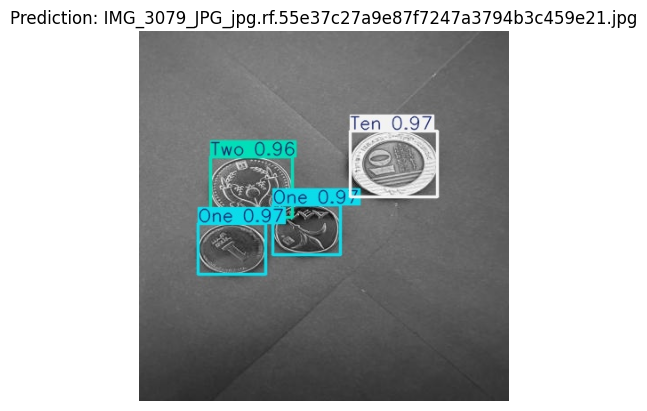

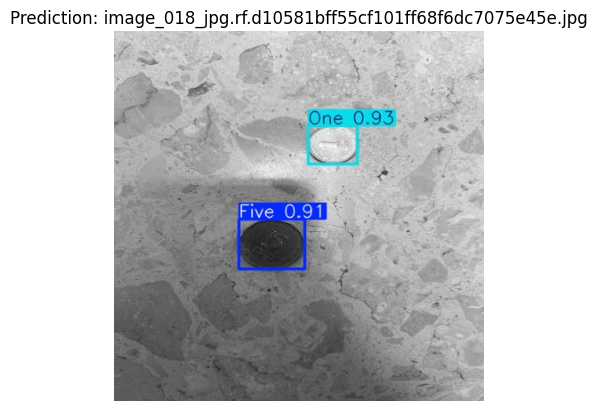

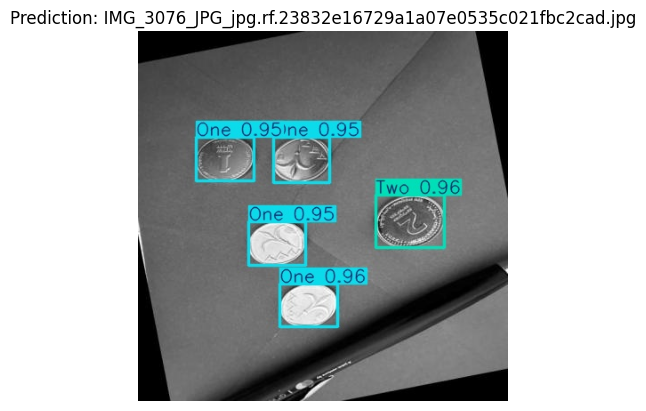

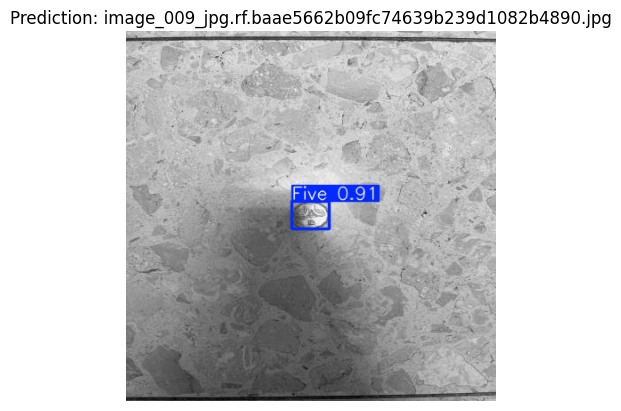

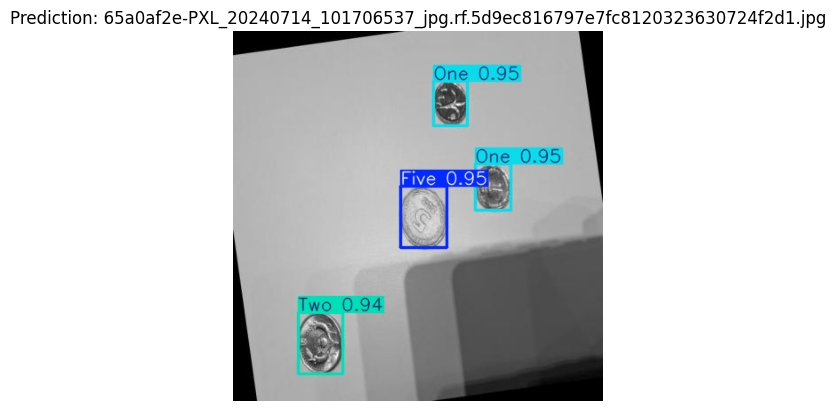

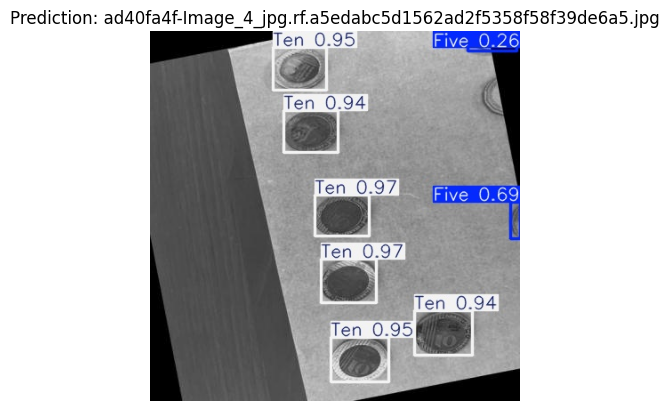

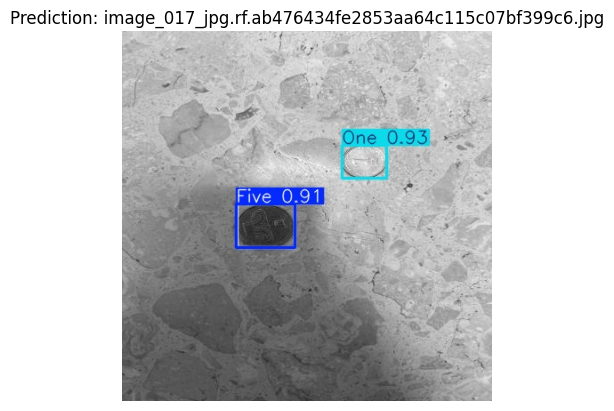

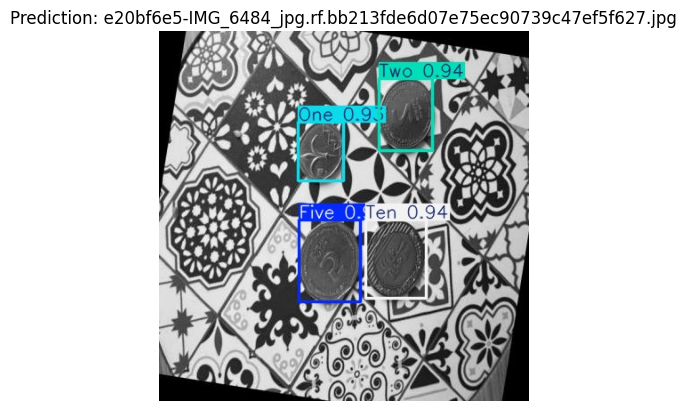

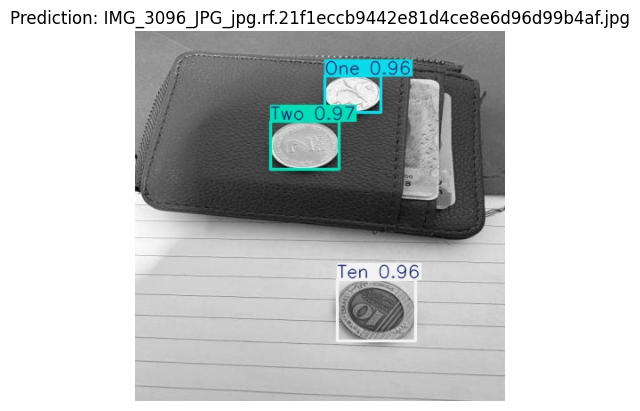

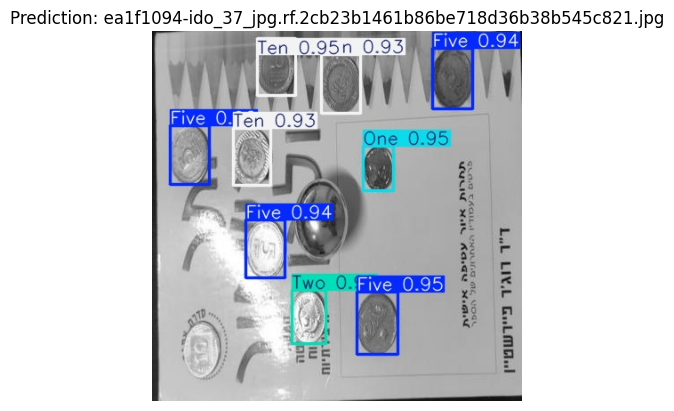

In [ ]:
# Display Example Predictions
result_images_dir = "runs/detect/Israeli_Coins_Improved4"
if os.path.exists(result_images_dir):
    result_images = [img for img in os.listdir(result_images_dir) if img.endswith((".jpg", ".png"))]
    for img_name in result_images[:10]:  # Display first 10 predictions
        img_path = os.path.join(result_images_dir, img_name)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Prediction: {img_name}")
        plt.show()

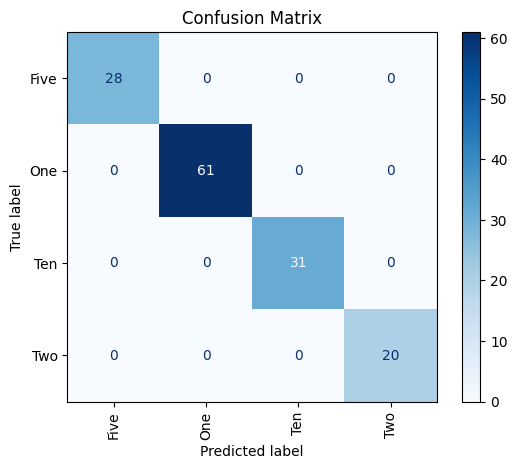

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

true_labels = []  # Ground truth labels
pred_labels = []  # Predicted labels

for result in results:
    # Assuming `cls` provides the ground truth and `data` provides predictions
    true_labels.extend(result.boxes.cls.tolist())  # Ground truth class labels
    pred_labels.extend(result.boxes.data[:, -1].tolist())  # Predicted class labels


# Align lengths of true_labels and pred_labels
min_len = min(len(true_labels), len(pred_labels))
if len(true_labels) != len(pred_labels):
    print("Warning: Mismatch between ground truth and predictions! Aligning lengths...")
    true_labels = true_labels[:min_len]
    pred_labels = pred_labels[:min_len]

# Generate confusion matrix
class_names = model.names  # Class names from the model
cm = confusion_matrix(true_labels, pred_labels, labels=range(len(class_names)))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names.values())
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()


True Labels: [0.0, 1.0, 1.0, 3.0, 2.0, 2.0, 0.0, 0.0, 2.0, 3.0, 0.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 3.0, 0.0, 2.0, 1.0, 3.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 3.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 0.0, 1.0, 3.0, 1.0, 0.0, 1.0, 2.0, 3.0, 1.0, 1.0, 2.0, 3.0, 0.0, 3.0]
Predicted Labels: [0.0, 1.0, 1.0, 3.0, 2.0, 2.0, 0.0, 0.0, 2.0, 3.0, 0.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.

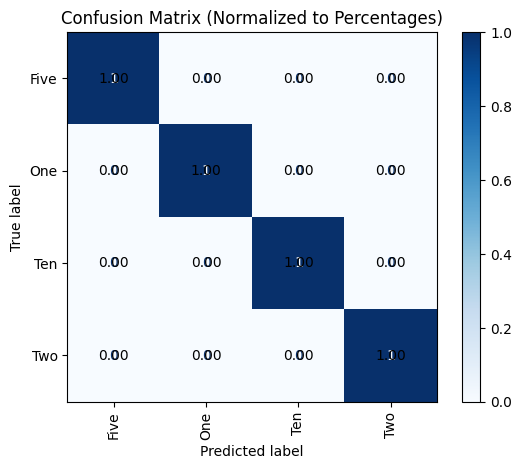

In [ ]:
# Check `true_labels` and `pred_labels`
print("True Labels:", true_labels)
print("Predicted Labels:", pred_labels)

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=range(len(model.names)))

# Normalize the confusion matrix
row_sums = cm.sum(axis=1, keepdims=True)
cm_percentage = np.divide(cm, row_sums, where=row_sums != 0)  # Avoid division by zero
cm_percentage = np.nan_to_num(cm_percentage)  # Replace NaN values with 0

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=model.names.values())
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")

# Add percentage annotations
for i in range(cm_percentage.shape[0]):
    for j in range(cm_percentage.shape[1]):
        plt.text(
            j, i, f"{cm_percentage[i, j]:.2f}",
            ha="center", va="center", color="black"
        )

plt.title("Confusion Matrix (Normalized to Percentages)")
plt.show()

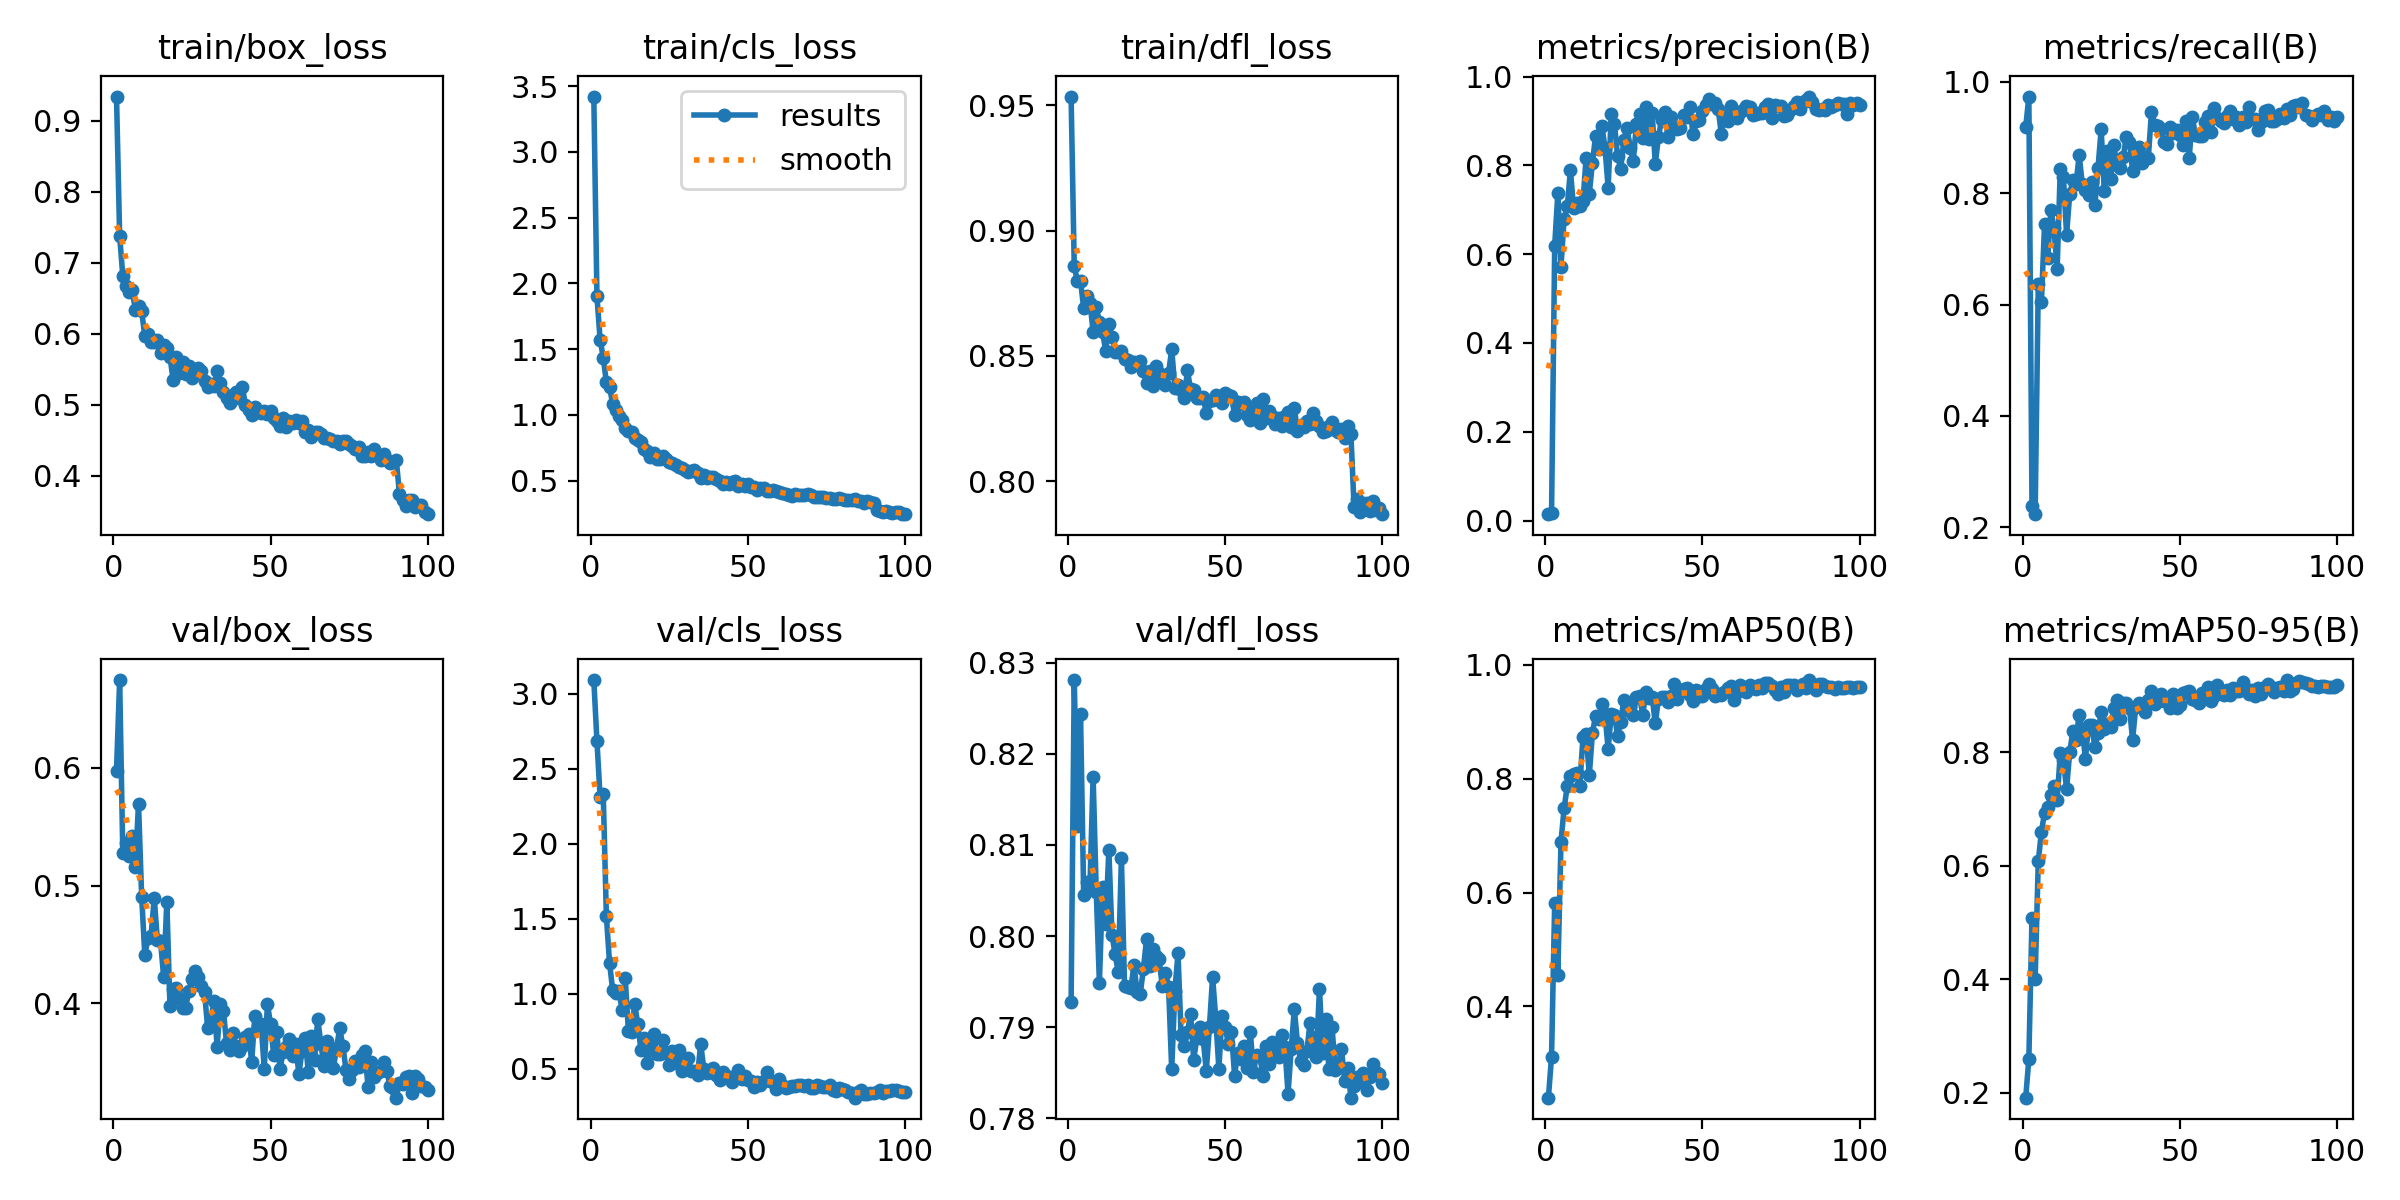

In [ ]:
from IPython.display import Image, display

# Define the path to the results image
results_path = '/content/runs/detect/Israeli_Coins_Improved/results.png'

# Display the results image
try:
    display(Image(filename=results_path))
except FileNotFoundError:
    print(f"Results image not found at {results_path}. Please ensure the training process generated the image.")

In [ ]:
model = YOLO('/content/runs/detect/Israeli_Coins_Improved/weights/best.pt')  # Use fine-tuned weights

for result in results:
    print("Detections:", result.boxes)

Detections: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 1., 1., 3.], device='cuda:0')
conf: tensor([0.9545, 0.9465, 0.9455, 0.9394], device='cuda:0')
data: tensor([[188.2779, 174.9503, 240.0806, 243.7650,   0.9545,   0.0000],
        [225.5002,  56.5239, 263.3698, 106.0322,   0.9465,   1.0000],
        [272.3397, 149.9149, 312.0124, 201.9879,   0.9455,   1.0000],
        [ 73.7839, 316.3166, 123.7948, 385.0209,   0.9394,   3.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([4, 6])
xywh: tensor([[214.1793, 209.3577,  51.8027,  68.8147],
        [244.4350,  81.2780,  37.8696,  49.5083],
        [292.1761, 175.9514,  39.6727,  52.0730],
        [ 98.7894, 350.6688,  50.0109,  68.7043]], device='cuda:0')
xywhn: tensor([[0.5149, 0.5033, 0.1245, 0.1654],
        [0.5876, 0.1954, 0.0910, 0.1190],
        [0.7023, 0.4230, 0.0954, 0.1252],
        [0.2375, 0.8430, 0.1202, 0.1652]], device='cuda:0')
xyxy: tensor([[188.2779,

In [ ]:
shekel_values = {0: 5, 1: 1, 2: 10, 3: 2}  # Ensure alignment with data.yaml
pred_labels = []
true_labels = []

for result in results:
    if len(result.boxes.cls) > 0:  # Avoid empty detections
        true_labels.extend(result.boxes.cls.tolist())  # Ground truth class labels
        pred_labels.extend(result.boxes.data[:, -1].tolist())  # Predicted class labels
    else:
        print("No detections for one result.")


In [ ]:
# Load the fine-tuned model
model_path = "/content/runs/detect/Israeli_Coins_Improved/weights/best.pt"  # Ensure this path is correct
model = YOLO(model_path)

# Define paths to test images and ground truths
test_images_path = "/content/Israeli-coins-detected-3/test/images"
test_labels_path = "/content/Israeli-coins-detected-3/test/labels"

# Define class-to-value mapping
shekel_values = {0: 5, 1: 1, 2: 10, 3: 2}  # Align with data.yaml

# Initialize lists to store predictions and ground truths
predictions = []
ground_truths = []
true_labels = []  # For confusion matrix
pred_labels = []  # For confusion matrix

# Iterate over test images
image_files = os.listdir(test_images_path)
for image_file in image_files:
    full_image_path = os.path.join(test_images_path, image_file)
    label_file_path = os.path.join(test_labels_path, image_file.replace(".jpg", ".txt"))

    # Check if the image exists
    if os.path.exists(full_image_path):
        # Run prediction
        results = model(full_image_path)
        detections = results[0].boxes  # Extract detections

        # Check if detections exist
        if len(detections.cls) > 0:
            # Extract predicted labels
            pred_labels.extend(detections.cls.cpu().numpy().astype(int).tolist())

            # Calculate the predicted total value
            detection_df = pd.DataFrame({
                'class': detections.cls.cpu().numpy().astype(int),
                'confidence': detections.conf.cpu().numpy(),
                'x_min': detections.xyxy[:, 0].cpu().numpy(),
                'y_min': detections.xyxy[:, 1].cpu().numpy(),
                'x_max': detections.xyxy[:, 2].cpu().numpy(),
                'y_max': detections.xyxy[:, 3].cpu().numpy(),
            })
            predicted_total = detection_df['class'].map(shekel_values).sum()
        else:
            print(f"No detections for {image_file}.")
            predicted_total = 0  # No detections result in 0 value
            pred_labels.extend([])

        # Calculate ground truth total value
        ground_truth_total = 0
        if os.path.exists(label_file_path):
            with open(label_file_path, "r") as f:
                for line in f:
                    class_id = int(line.split()[0])
                    ground_truth_total += shekel_values[class_id]
                    true_labels.append(class_id)  # Append ground truth class for confusion matrix

        predictions.append(predicted_total)
        ground_truths.append(ground_truth_total)

        print(f"Predicted: {predicted_total} NIS, Ground Truth: {ground_truth_total} NIS")
    else:
        print(f"Image {full_image_path} not found!")

# Calculate Average Accuracy
def calculate_accuracy(ground_truth, predicted):
    if ground_truth == 0:  # Handle edge case where ground truth is 0
        return 0 if predicted > 0 else 1
    accuracy = 1 - abs(ground_truth - predicted) / ground_truth
    return max(0, accuracy)  # Ensure accuracy is not negative

accuracies = [calculate_accuracy(gt, pred) for gt, pred in zip(ground_truths, predictions)]
average_accuracy = sum(accuracies) / len(accuracies) if accuracies else 0
print(f"\nAverage Accuracy: {average_accuracy * 100:.2f}%")


image 1/1 /content/Israeli-coins-detected-3/test/images/IMG_3079_JPG_jpg.rf.55e37c27a9e87f7247a3794b3c459e21.jpg: 416x416 2 Ones, 1 Ten, 1 Two, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)
Predicted: 14 NIS, Ground Truth: 14 NIS

image 1/1 /content/Israeli-coins-detected-3/test/images/image_018_jpg.rf.d10581bff55cf101ff68f6dc7075e45e.jpg: 416x416 1 Five, 1 One, 11.7ms
Speed: 1.3ms preprocess, 11.7ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Predicted: 6 NIS, Ground Truth: 6 NIS

image 1/1 /content/Israeli-coins-detected-3/test/images/IMG_3076_JPG_jpg.rf.23832e16729a1a07e0535c021fbc2cad.jpg: 416x416 4 Ones, 1 Two, 11.2ms
Speed: 1.1ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Predicted: 6 NIS, Ground Truth: 6 NIS

image 1/1 /content/Israeli-coins-detected-3/test/images/image_009_jpg.rf.baae5662b09fc74639b239d1082b4890.jpg: 416x416 1 Five, 12.9ms
Speed: 1.2ms prepro